### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np

#### Read the files

In [2]:
cause_of_death = pd.read_csv("../../../../data/stage_1/Underlying Cause of Death-County-2019.txt", sep="\t")

In [3]:
cause_of_death = pd.read_csv("../../../../data/stage_1/Underlying Cause of Death-County-2019.txt", sep="\t")
health_ranking = pd.read_csv("../../../../data/stage_1/County_Health_Ranking.csv")
opioid_rate = pd.read_csv("../../../../data/stage_1/2019-Opioid_Rate.csv",encoding='unicode_escape')

In [4]:
#shape of the datasets
cause_of_death.shape , health_ranking.shape , opioid_rate.shape

((5541, 8), (3193, 534), (3095, 4))

#### Cleaning the datasets

In [5]:
#Removing the columns that are not important and have NAN values throughout 
cause_of_death = cause_of_death.drop(columns=['Notes' ])

#### Sites referred for the  below task 
* https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html
* https://sparkbyexamples.com/pandas/pandas-groupby-explained-with-examples/

### Calculate the normalized death for deaths per 100,000 population

#### For this task I divided the deaths column with population and multiplied by 100000 to get deaths per 100000 population. Since the deaths cannot be a float value I rounded the normalized deaths using round()

In [6]:
cause_of_death['Norm_deaths'] = (cause_of_death['Deaths']/cause_of_death['Population'] * 100000).round()

In [7]:
cause_of_death.head(5)

,County,County Code,Drug/Alcohol Induced Cause,Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate,Norm_deaths
0,"Autauga County, AL",1001,Drug poisonings (overdose) Unintentional (X40-...,D1,69,1087149,6.3,6.0
1,"Autauga County, AL",1001,Drug poisonings (overdose) Suicide (X60-X64),D2,14,1087149,Unreliable,1.0
2,"Baldwin County, AL",1003,Drug poisonings (overdose) Unintentional (X40-...,D1,424,3758097,11.3,11.0
3,"Baldwin County, AL",1003,Drug poisonings (overdose) Suicide (X60-X64),D2,71,3758097,1.9,2.0
4,"Baldwin County, AL",1003,Drug poisonings (overdose) Undetermined (Y10-Y14),D4,19,3758097,Unreliable,1.0


#### Since there are mutiple rows for same county I grouped the data by County , County Code and Population and summed the Deaths and Norm_Deaths column for each county to match the super data that was provided on the github repo. Used reset_index() to make the indexes as columns.

 * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [8]:
cause_of_death = cause_of_death.groupby(['County' ,'County Code' , 'Population'])[['Deaths','Norm_deaths']].sum().reset_index()

In [9]:
cause_of_death.head(3)

,County,County Code,Population,Deaths,Norm_deaths
0,"Abbeville County, SC",45001,535389,38,7.0
1,"Acadia Parish, LA",22001,1279727,237,19.0
2,"Accomack County, VA",51001,726189,73,11.0


In [10]:
health_ranking.head(3)

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,1,0,1000,AL,Alabama,2019,NaN,9917.232898,80440.0,13636816.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1001,AL,Autauga County,2019,1.0,8824.057123,815.0,156132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,1003,AL,Baldwin County,2019,1.0,7224.632160,2827.0,576496.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
opioid_rate.head(3)

,State,County,FIPS,Opiod_Dispensing_Rate
0,AL,Autauga County,1001,101.3
1,AL,Baldwin County,1003,67.6
2,AL,Barbour County,1005,27.2


### Merge all the three datasets to create a super datafame

  * For this task I merge the two datasets that is cause_of_death and health ranking and create the first merge of two datasets. . Later I use the created dataset and merge with opiod to create a super dataset. The variables I used for first merge is County Code from the cause of death dataset and 5-digit FIPS Code from the health ranking dataset. Both the variables are same its just that they have different names. So instead of renaming the columns and merging I used left on and right on parameter of merge function to specify the variable on which I want to merge. 
    
  * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
   

In [12]:
merge_cause_health = cause_of_death.merge(health_ranking, left_on='County Code',
                  right_on= '5-digit FIPS Code')

In [13]:
merge_cause_health.shape

(2528, 539)

In [14]:
merge_cause_health.head(3)

,County,County Code,Population,Deaths,Norm_deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,"Abbeville County, SC",45001,535389,38,7.0,45,1,45001,SC,Abbeville County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Acadia Parish, LA",22001,1279727,237,19.0,22,1,22001,LA,Acadia Parish,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### creating a super dataset with shape (2527 , 542)  by merging all the  three datasets

    * In this task I merge on FIPS Code of both the datasets. They have different variable names but both have same values hence merged them to create a super dataset of shape (2527 , 542)

In [15]:
super_df = pd.merge(merge_cause_health , opioid_rate, left_on='5-digit FIPS Code',
                  right_on= 'FIPS')

In [16]:
super_df.columns

Index(['County_x', 'County Code', 'Population', 'Deaths', 'Norm_deaths',
       'State FIPS Code', 'County FIPS Code', '5-digit FIPS Code',
       'State Abbreviation', 'Name',
       ...
       'Female population 0-17 raw value', 'Female population 18-44 raw value',
       'Female population 45-64 raw value', 'Female population 65+ raw value',
       'Total female population raw value', 'Population growth raw value',
       'State', 'County_y', 'FIPS', 'Opiod_Dispensing_Rate'],
      dtype='object', length=543)

In [17]:
super_df.shape

(2527, 543)

#### We observe that County_x and County_y are the duplicates so dropping one of them to match the shape and also both columns are same. 

In [18]:
super_df = super_df.drop(columns=['County_y'])

In [19]:
super_df = super_df.rename(columns = {'County_x' : 'County'})

In [20]:
super_df.shape

(2527, 542)

### Thus the final shape of the super dataset is (2527, 542) and saving the file using to_csv() function

In [21]:
super_df.to_csv('../../../../data/stage_1/super_df.csv')

##  Top 10 counties and state with high mortality rate

Refered the below sites for reference : 

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
*  https://github.com/UNCGCSE/CSC605_Fall_2022/blob/main/Class_Resources/Lecture_05/Pandas/2.%20Data%20Wrangling%20with%20Pandas.ipynb
*https://github.com/UNCG-CSE/CSC-605_Fall_2022/blob/main/Class_Resources/Lecture_06/Statistics/01_Stats_Basics.ipynb

### Top ten counties 

* Used the sort_values() function to sort by Norm_deaths as the super dataset created gives information county wise. So I tried to display County and Norm_deaths in the descending order to get the top ten counties with high mortality rates.

In [22]:
top10_county = super_df[['County','Norm_deaths']].sort_values(by=['Norm_deaths'],ascending=False).head(10)
top10_county

,County,Norm_deaths
1956,"Rio Arriba County, NM",63.0
1486,"McDowell County, WV",61.0
2502,"Wyoming County, WV",56.0
103,"Baltimore city, MD",51.0
281,"Cabell County, WV",48.0
204,"Boone County, WV",47.0
1364,"Logan County, WV",46.0
145,"Bell County, KY",45.0
1547,"Mingo County, WV",45.0
1521,"Mercer County, WV",44.0


### Top ten States 

* For this task, since the super data is grouped by county, to find the top ten states we need to group by states and get the total deaths and Normalized deaths values per state. Then I filtered the top ten states with highest norm_deaths values.  I used reset_index so as to make indexes as column in the dataframe.

In [23]:
top_ten_states = super_df.groupby(['State'])[['Deaths','Norm_deaths']].sum().reset_index()

In [24]:
top_ten_states = top_ten_states.sort_values(by=['Norm_deaths'] ,ascending=False).head(10)

In [25]:
top_ten_states

,State,Deaths,Norm_deaths
17,KY,17976,2209.0
42,TN,22941,1621.0
43,TX,48077,1467.0
27,NC,26444,1384.0
45,VA,16808,1375.0
35,OH,45618,1352.0
10,GA,20231,1323.0
15,IN,19306,1175.0
49,WV,10020,1171.0
24,MO,17871,1116.0


### Use mean and median for counties within states to compare (for the state level).

* For this task I am using the above created data to filter data from the super dataset to get only the top ten states records. For this task I am using isin() function to filter the data. Using aggregate function to calculate the mean and median of states and counties with Top 10 mortality death rates. 

   Referred the below site to get the information. 
   * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html?highlight=isi
   * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
   

   
 

In [26]:
states = top_ten_states['State']

In [27]:
df = super_df[super_df["State"].isin(states)]

### created a dataframe of top  states and getting all the records from each state  

#### The below is a dataframe with top 10 states records from the super df 

In [28]:
df.head(5)

,County,County Code,Population,Deaths,Norm_deaths,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,...,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value,State,FIPS,Opiod_Dispensing_Rate
2,"Accomack County, VA",51001,726189,73,11.0,51,1,51001,VA,Accomack County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,51001,19.4
4,"Adair County, KY",21001,387950,43,11.0,21,1,21001,KY,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KY,21001,71.3
5,"Adair County, MO",29001,530448,30,6.0,29,1,29001,MO,Adair County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MO,29001,89.2
9,"Adams County, IN",18001,721740,45,6.0,18,1,18001,IN,Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IN,18001,29.6
12,"Adams County, OH",39001,590060,140,24.0,39,1,39001,OH,Adams County,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OH,39001,39.7


#### since the super data is at county level information I group by states and calculate the mean on Norm_deaths column. Then I sort these values to get the mean of all the states in descending order using sort_values function

In [29]:
mean_state_df = df.groupby(['State'])['Norm_deaths'].aggregate('mean').reset_index()

In [30]:
mean_state_df = mean_state_df.sort_values(by = 'Norm_deaths' , ascending = False)
mean_state_df.rename(columns = {'Norm_deaths' : 'Norm_deaths_state_mean'} , inplace = True)
mean_state_df

,State,Norm_deaths_state_mean
9,WV,22.094340
2,KY,19.043103
6,TN,17.244681
5,OH,15.363636
4,NC,13.979798
1,IN,12.912088
3,MO,11.049505
8,VA,11.000000
0,GA,9.727941
7,TX,8.335227


#### I used the plot to give a visualisation of these values in order to understand better. The x-axis gives information of states and each number is the index from the dataframe.

* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

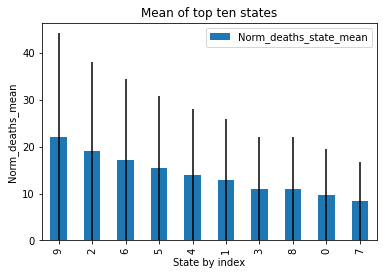

In [31]:
ax1 = mean_state_df.plot(kind='bar',
                   yerr=mean_state_df,
                   title="Mean of top ten states").set(xlabel='State by index',
         ylabel='Norm_deaths_mean')

In [32]:
mean_county_df = df.groupby(['County'])['Norm_deaths'].aggregate('mean').reset_index()

In [33]:
mean_county_df = mean_county_df.sort_values(by = 'Norm_deaths' , ascending = False)
mean_county_df.rename(columns = {'Norm_deaths' : 'Norm_deaths_county_mean'} , inplace = True)
mean_county_df

,County,Norm_deaths_county_mean
642,"McDowell County, WV",61.0
1071,"Wyoming County, WV",56.0
122,"Cabell County, WV",48.0
81,"Boone County, WV",47.0
588,"Logan County, WV",46.0
...,...,...
259,"Deaf Smith County, TX",3.0
461,"Holmes County, OH",2.0
540,"Lagrange County, IN",2.0
725,"Nodaway County, MO",2.0


In [34]:
median_state_df = df.groupby(['State'])['Norm_deaths'].aggregate('median').reset_index()
median_state_df = median_state_df.sort_values(by = 'Norm_deaths' , ascending = False)
median_state_df.rename(columns = {'Norm_deaths' : 'Norm_deaths_state_median'} , inplace = True)
median_state_df

,State,Norm_deaths_state_median
9,WV,19.0
6,TN,16.5
2,KY,16.0
5,OH,15.0
4,NC,14.0
1,IN,12.0
3,MO,11.0
0,GA,9.0
8,VA,9.0
7,TX,8.0


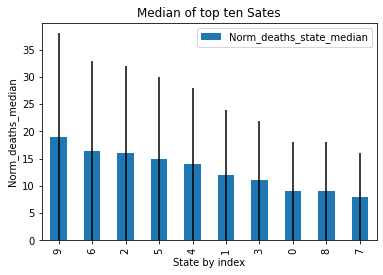

In [35]:
ax1 = median_state_df.plot(kind='bar',
                   yerr=median_state_df ,
                   title="Median of top ten Sates").set(xlabel='State by index',
         ylabel='Norm_deaths_median')

In [36]:
median_state_df = df.groupby(['County'])['Norm_deaths'].aggregate('median').reset_index()
median_state_df = median_state_df.sort_values(by = 'Norm_deaths' , ascending = False)
median_state_df.rename(columns = {'Norm_deaths' : 'Norm_deaths_county_median'} , inplace = True)
median_state_df

,County,Norm_deaths_county_median
642,"McDowell County, WV",61.0
1071,"Wyoming County, WV",56.0
122,"Cabell County, WV",48.0
81,"Boone County, WV",47.0
588,"Logan County, WV",46.0
...,...,...
259,"Deaf Smith County, TX",3.0
461,"Holmes County, OH",2.0
540,"Lagrange County, IN",2.0
725,"Nodaway County, MO",2.0


### Describe your intution on why the rates are high in these states and counties.

* From the above dataframe we observe that West Virginia had the highest mean and median values. 
  Mean: Since each state has different number of counties the mean value is dependant on that and from the statistics point of     view the mean value in all counties in the state of west virginia is 22.094340. 
  
* The median value gives an information of where the 50% of the data is lying. West Virginia has 19.0 as the median which means the death value in aroung 19 in each of the counties of a west virginia. 

* McDowell County in West Virginia has the highest mean and median values. With mean and median being 61.0.  As explained above the death rates in this county was atleast 61. Kentucky State is the second highest in mortality death rates. 


From DEA report published  I  analyzed that the reasons for this opioid epidemic incidence in West Virginia have been a combination of sociocultural factors, a depressed economy, lack of education, and a high rate of prescribing and dispensing of prescription opioids. We already saw that education and poverty variables were inversely corelated to opiod death rate in the report submitted on github. So people had no knowledge as in how risky the intake of drugs would be and also mixing them with other would lead to overdose. The state had highest death rates recorded in 2015 and more than accidents or injuries the number of overdose cases were more. According to the reports Controlled Precription Drug abuse and trafficking has long been the leading drug problem in West Virginia and is responsible for overdose of deaths in the state.  The state is also known for highest unemployment rate and many of them went into illegal buisness to earn money. It was also found that the manual labours who had major injuries started consuming opiods as pain reliefs and then started getting addicted to them. Also the pharmacies in West Virginia both knowingly or unknowingly fill fraudulent prescriptions and there have been cases where the pharmacy employee sold the drugs to the street dealers. There also might be a possibility of robbery where they stole from pharmacies and distributed themselves or to sold to larger distributors. 

Thus from the above analysis I conclude that west virginia had the highest death rates for opiod and above  is my intuition why there was high death rates in these states and counties. 

